In [ ]:
# default_exp stats

# stats

> tools for statistical analysis

In [ ]:
#export
import xarray as xr
import numpy as np

In [ ]:
#export
def regression(data, index):
    """
    Fast regression for spatial `data` onto 1d `index`.
    """

    data_flat = data.reshape(data.shape[0], np.product(data.shape[1:]))
    
    index = np.vstack((np.ones(len(index)), index)).T
    beta_hat = np.linalg.inv(index.T.dot(index)).dot(index.T).dot(data_flat)
    
    b0, b1 = beta_hat[0], beta_hat[1]
    b0 = b0.reshape((data.shape[1], data.shape[2]))
    b1 = b1.reshape((data.shape[1], data.shape[2]))

    return b0, b1

In [ ]:
#hide
from nbdev import *
import matplotlib.pyplot as plt

In [ ]:
show_doc(regression)

<h4 id="regression" class="doc_header"><code>regression</code><a href="__main__.py#L2" class="source_link" style="float:right">[source]</a></h4>

> <code>regression</code>(**`data`**, **`index`**)

Fast regression for spatial `data` onto `index`.

In [ ]:
#export

time = np.linspace(1, 100, 100)
lat, lon = np.ogrid[-45:45:50j, 0:360:100j]

noise = 5 * np.sin(np.random.randn(time.shape[0], 
                                   lat.shape[0],
                                   lon.shape[1])/2*np.pi)

data_vars = {'noise': (['time', 'lat', 'lon'], noise)}
coords = {'time': time, 'lat': lat.ravel(), 'lon': lon.ravel()}
dataset = xr.Dataset(data_vars, coords)

In [ ]:
index = np.sin(time/2*np.pi)

In [ ]:
a0, a1 = regression(dataset.noise.values, index)

In [ ]:
dataset['a0'] = (("lat", "lon"), a0)
dataset['a1'] = (("lat", "lon"), a1)

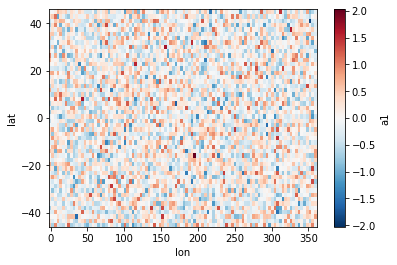

In [ ]:
dataset['a1'].plot()

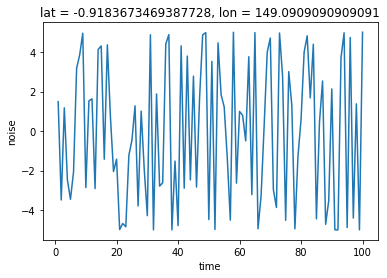

In [ ]:
aoi = dataset.sel(lon = 150, lat = 0, method = "nearest")
aoi.noise.plot()

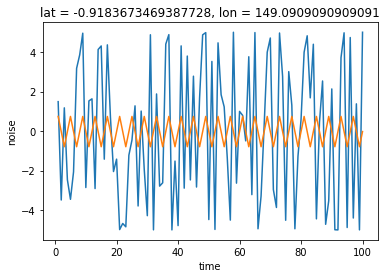

In [ ]:
aoi.noise.plot()
plt.plot(aoi.time, aoi['a0'].values + aoi['a1'].values * index)